<a href="https://colab.research.google.com/github/abhir00p/22BDS0016-EDA/blob/main/22BDS0016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fertility2.csv'

df = pd.read_csv(url)

print(df.head())

   rownames morekids gender1 gender2  age afam hispanic other  work
0         1       no  female  female   35   no       no    no    40
1         2       no  female    male   33   no       no    no    52
2         3       no  female  female   28   no       no    no    12
3         4       no    male    male   28   no       no    no     0
4         5       no  female    male   31   no       no    no     0


In [ ]:
# Display the number of rows and columns
print(df.shape)

(30000, 9)


In [ ]:
# Display the column headers
print(df.columns)

Index(['rownames', 'morekids', 'gender1', 'gender2', 'age', 'afam', 'hispanic',
       'other', 'work'],
      dtype='object')


In [ ]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  30000 non-null  int64 
 1   morekids  30000 non-null  object
 2   gender1   30000 non-null  object
 3   gender2   30000 non-null  object
 4   age       30000 non-null  int64 
 5   afam      30000 non-null  object
 6   hispanic  30000 non-null  object
 7   other     30000 non-null  object
 8   work      30000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


In [ ]:
# View the first 3 rows
print("First 3 rows:")
print(df.head(3))

# View the last 3 rows
print("\nLast 3 rows:")
print(df.tail(3))

First 3 rows:
   rownames morekids gender1 gender2  age afam hispanic other  work
0         1       no  female  female   35   no       no    no    40
1         2       no  female    male   33   no       no    no    52
2         3       no  female  female   28   no       no    no    12

Last 3 rows:
       rownames morekids gender1 gender2  age afam hispanic other  work
29997     29998      yes    male  female   34   no       no    no    42
29998     29999      yes    male    male   31  yes       no    no    52
29999     30000       no  female  female   29   no       no    no     0


In [ ]:
# Show summary statistics for numerical columns
print(df.describe())

           rownames           age          work
count  30000.000000  30000.000000  30000.000000
mean   15000.500000     30.354267     19.209500
std     8660.398374      3.383432     21.941018
min        1.000000     21.000000      0.000000
25%     7500.750000     28.000000      0.000000
50%    15000.500000     31.000000      6.000000
75%    22500.250000     33.000000     45.000000
max    30000.000000     35.000000     52.000000


In [ ]:
# Count non-numeric values in the 'age' column
non_numeric_age = pd.to_numeric(df['age'], errors='coerce').isna().sum()
print(f"Number of non-numeric values in 'age': {non_numeric_age}")

# Count non-numeric values in the 'work' column
non_numeric_work = pd.to_numeric(df['work'], errors='coerce').isna().sum()
print(f"Number of non-numeric values in 'work': {non_numeric_work}")

Number of non-numeric values in 'age': 0
Number of non-numeric values in 'work': 0


In [ ]:
# Clean the 'age' column
age_numeric = pd.to_numeric(df['age'], errors='coerce')
mean_age = age_numeric.mean()
df['age'] = age_numeric.fillna(mean_age)


# Clean the 'work' column
work_numeric = pd.to_numeric(df['work'], errors='coerce')
mean_work = work_numeric.mean()
df['work'] = work_numeric.fillna(mean_work)

In [ ]:
# Select only the numeric columns for statistical analysis
numeric_df = df[['age','work']]

In [ ]:
# Calculate mean
print("## Mean ##")
print(numeric_df.mean())

# Calculate median
print("\n## Median ##")
print(numeric_df.median())

# Calculate mode
print("\n## Mode ##")
print(numeric_df.mode().iloc[0])

## Mean ##
age     30.354267
work    19.209500
dtype: float64

## Median ##
age     31.0
work     6.0
dtype: float64

## Mode ##
age     33
work     0
Name: 0, dtype: int64


In [ ]:
print("## Five-Number Summary ##")
print(numeric_df.describe())

# Calculating Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("\n## Interquartile Range (IQR) ##")
print(IQR)

## Five-Number Summary ##
                age          work
count  30000.000000  30000.000000
mean      30.354267     19.209500
std        3.383432     21.941018
min       21.000000      0.000000
25%       28.000000      0.000000
50%       31.000000      6.000000
75%       33.000000     45.000000
max       35.000000     52.000000

## Interquartile Range (IQR) ##
age      5.0
work    45.0
dtype: float64


In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print("## Correlation Matrix ##")
print(correlation_matrix)

## Correlation Matrix ##
           age      work
age   1.000000  0.109168
work  0.109168  1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

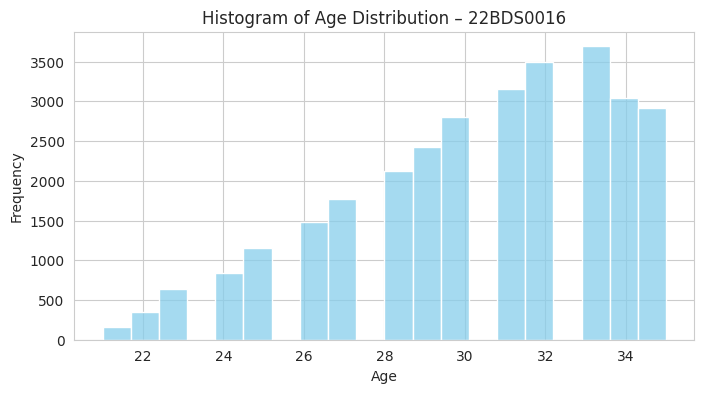

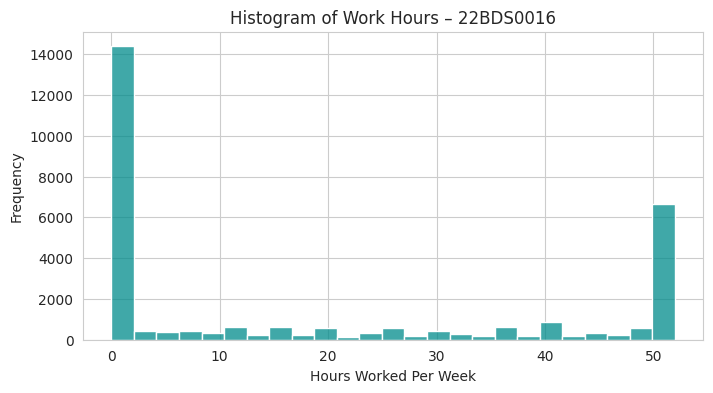

In [ ]:
plt.figure(figsize=(8, 4))

# Histogram for age
sns.histplot(data=df, x='age', bins=20, color='skyblue')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution – 22BDS0016")

plt.show()

plt.figure(figsize=(8, 4))

# Histogram for work
sns.histplot(data=df, x='work', bins=25, kde=False, color='darkcyan')

plt.xlabel("Hours Worked Per Week")
plt.ylabel("Frequency")
plt.title("Histogram of Work Hours – 22BDS0016")

plt.show()

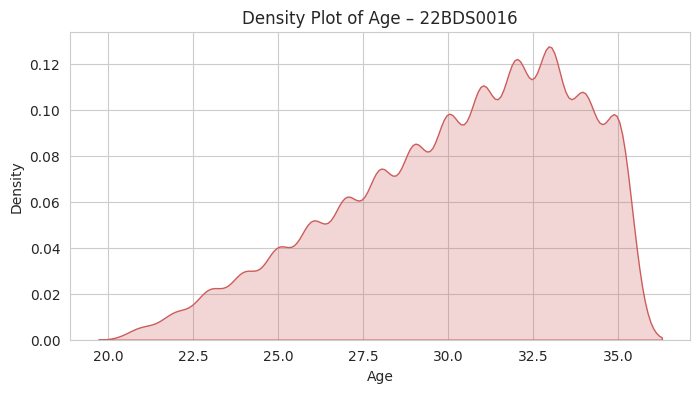

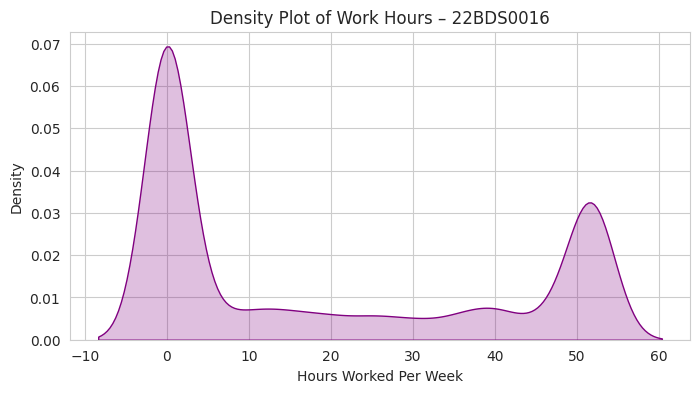

In [ ]:
plt.figure(figsize=(8, 4))

#Desity Plot for age
sns.kdeplot(data=df, x='age', fill=True, color='indianred')

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of Age – 22BDS0016")

plt.show()

plt.figure(figsize=(8, 4))

# Density Plot for work
sns.kdeplot(data=df, x='work', fill=True, color='purple')

plt.xlabel("Hours Worked Per Week")
plt.ylabel("Density")
plt.title("Density Plot of Work Hours – 22BDS0016")

plt.show()

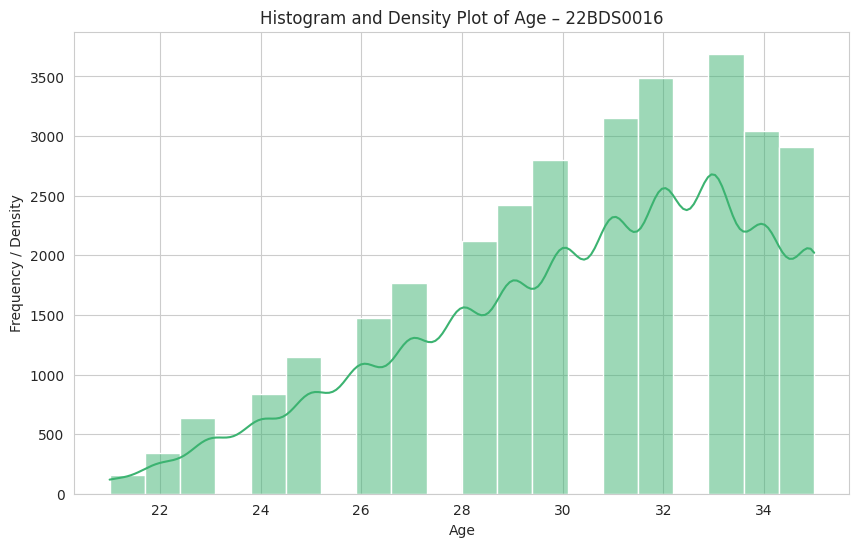

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram with a KDE overlay
sns.histplot(data=df, x='age', kde=True, bins=20, color='mediumseagreen')

plt.xlabel("Age")
plt.ylabel("Frequency / Density")
plt.title("Histogram and Density Plot of Age – 22BDS0016")

plt.show()

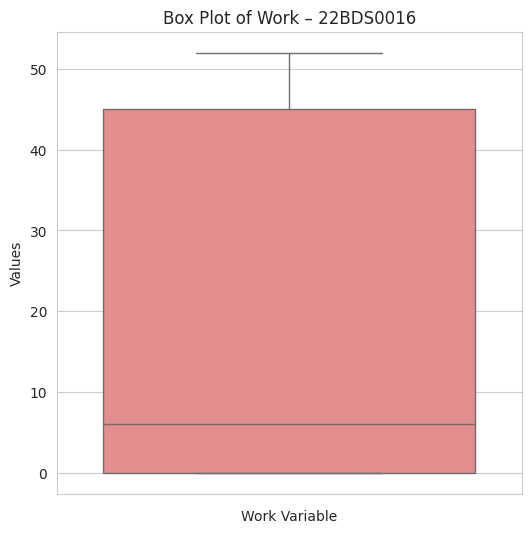

In [ ]:
plt.figure(figsize=(6, 6))

# Box plot
sns.boxplot(data=df, y='work', color='lightcoral')

plt.xlabel("Work Variable")
plt.ylabel("Values")
plt.title("Box Plot of Work – 22BDS0016")

plt.show()

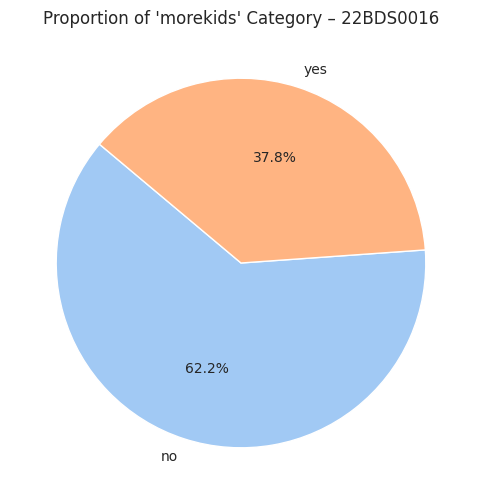

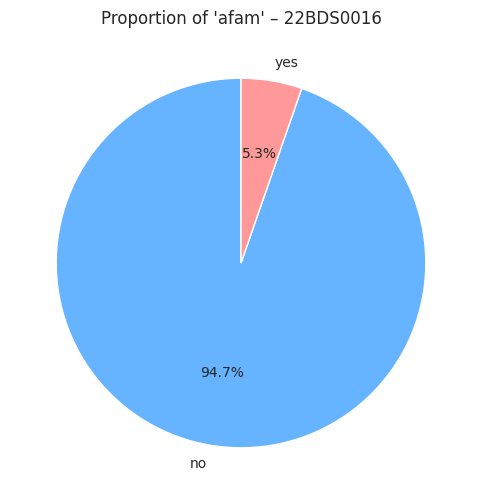

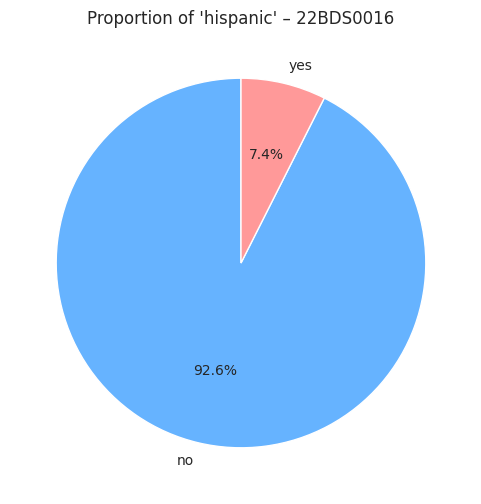

In [ ]:
plt.figure(figsize=(6, 6))

morekids_counts = df['morekids'].value_counts()

# Pie chart fro morekids
plt.pie(morekids_counts, labels=morekids_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title("Proportion of 'morekids' Category – 22BDS0016")
plt.ylabel('')

plt.show()

plt.figure(figsize=(6, 6))

# Pie chart for afam
counts = df['afam'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Proportion of 'afam' – 22BDS0016")
plt.ylabel('')

plt.show()

plt.figure(figsize=(6, 6))

# Pie chart for hispanic
counts = df['hispanic'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Proportion of 'hispanic' – 22BDS0016")
plt.ylabel('')

plt.show()

/tmp/ipython-input-3052217261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='morekids', y='age', jitter=True, palette='viridis')


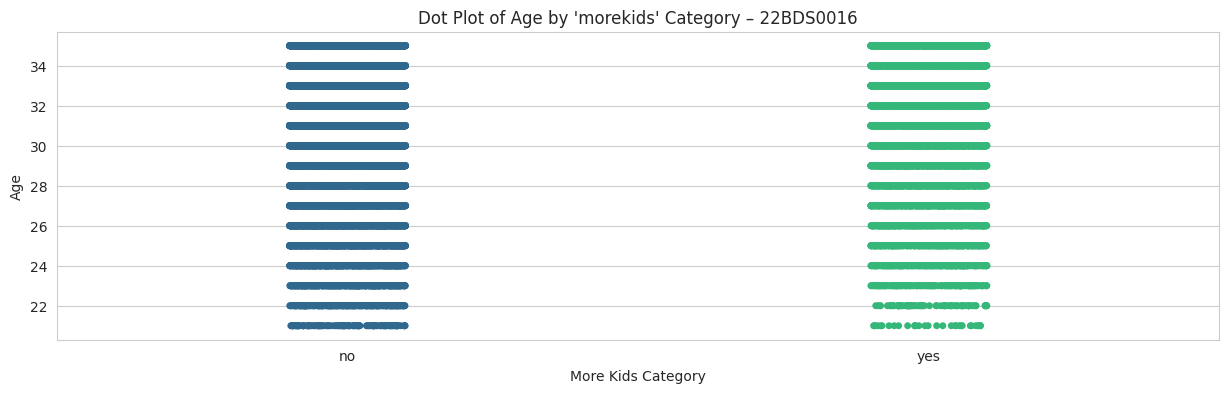

In [ ]:
plt.figure(figsize=(15, 4))

# Dot plot (stripplot)
sns.stripplot(data=df, x='morekids', y='age', jitter=True, palette='viridis')

plt.xlabel("More Kids Category")
plt.ylabel("Age")
plt.title("Dot Plot of Age by 'morekids' Category – 22BDS0016")

plt.show()

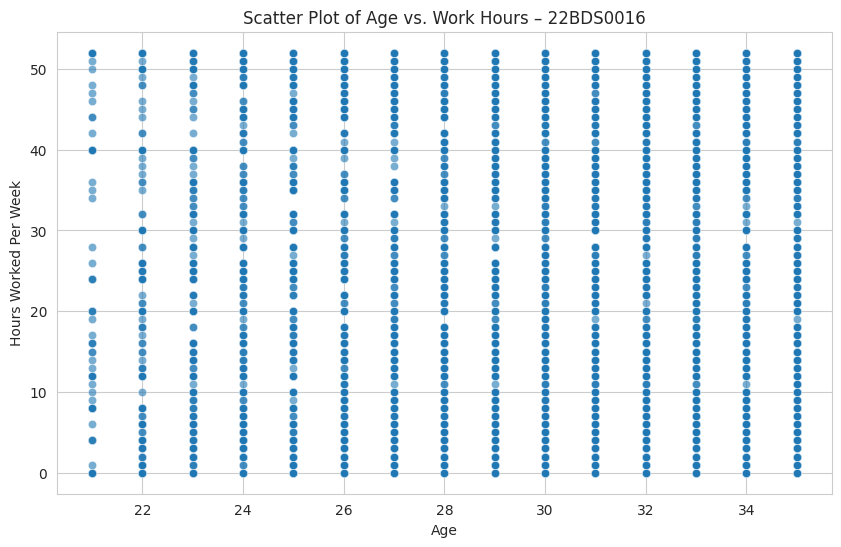

In [ ]:
# Scatter Plot age vs work
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='work', alpha=0.6)
plt.title("Scatter Plot of Age vs. Work Hours – 22BDS0016")
plt.xlabel("Age")
plt.ylabel("Hours Worked Per Week")
plt.grid(True)
plt.show()

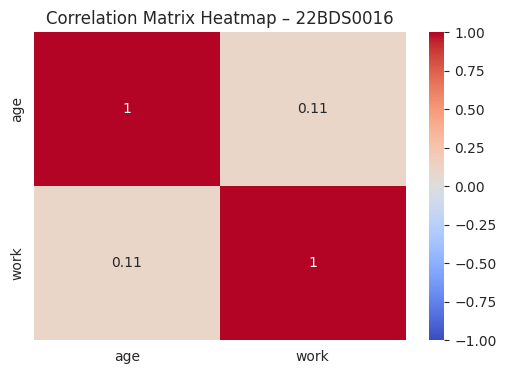

In [ ]:
correlation_matrix = df[['age', 'work']].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap – 22BDS0016")
plt.show()

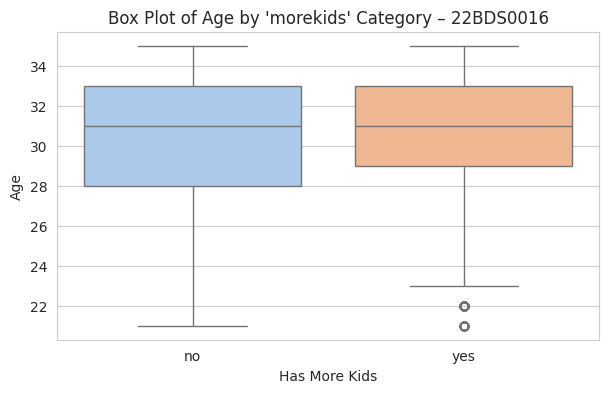

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='morekids', y='age', palette='pastel', hue='morekids', legend=False)
plt.title("Box Plot of Age by 'morekids' Category – 22BDS0016")
plt.xlabel("Has More Kids")
plt.ylabel("Age")
plt.show()

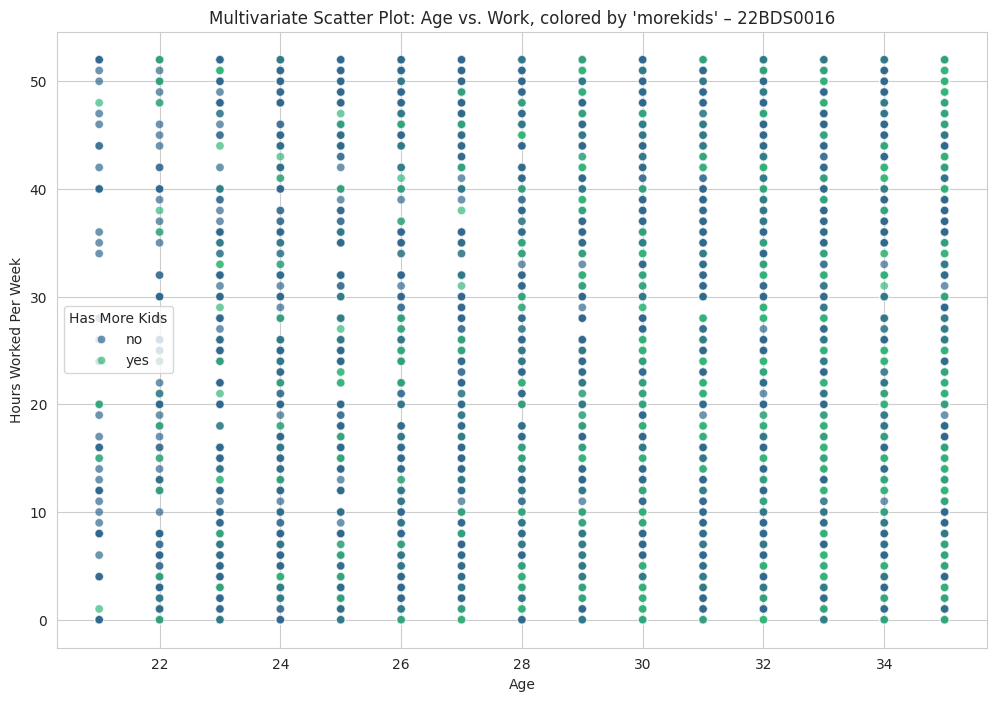

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='work', hue='morekids', alpha=0.7, palette='viridis')
plt.title("Multivariate Scatter Plot: Age vs. Work, colored by 'morekids' – 22BDS0016")
plt.xlabel("Age")
plt.ylabel("Hours Worked Per Week")
plt.legend(title='Has More Kids')
plt.grid(True)
plt.show()


## Skewness of Numerical Columns ##
age    -0.580214
work    0.522752
dtype: float64


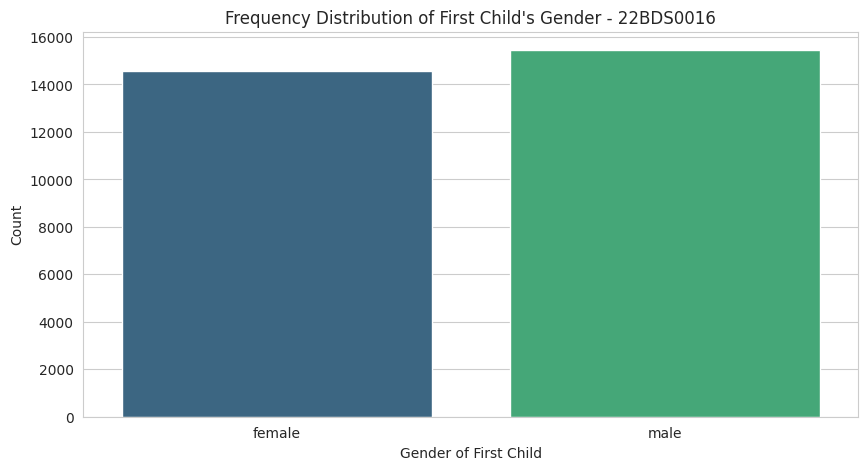

In [ ]:
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# --- 1D Analysis ---

print("\n## Skewness of Numerical Columns ##")
print(numeric_df.skew())

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender1', palette='viridis', hue='gender1', legend=False)
plt.title("Frequency Distribution of First Child's Gender - 22BDS0016")
plt.xlabel("Gender of First Child")
plt.ylabel("Count")
plt.show()



## Contingency Table: Gender of First Child vs. More Kids ##
morekids    no   yes
gender1             
female    9026  5523
male      9646  5805


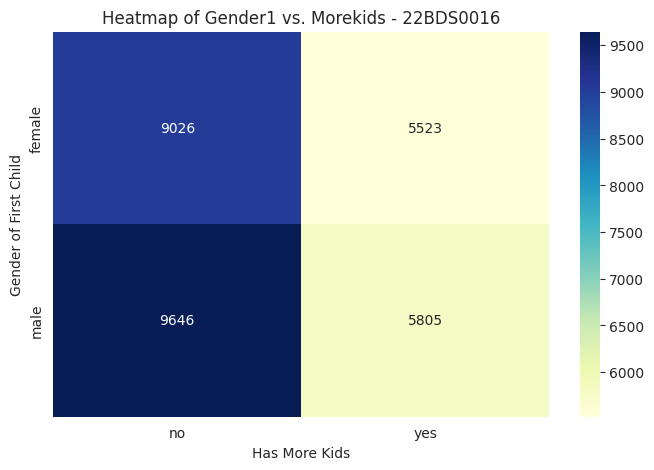

In [ ]:
# --- 2D Analysis (Categorical vs. Categorical) ---

# Contingency table
gender_morekids_crosstab = pd.crosstab(df['gender1'], df['morekids'])
print("\n## Contingency Table: Gender of First Child vs. More Kids ##")
print(gender_morekids_crosstab)

# Heatmap for the contingency table
plt.figure(figsize=(8, 5))
sns.heatmap(gender_morekids_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Gender1 vs. Morekids - 22BDS0016")
plt.xlabel("Has More Kids")
plt.ylabel("Gender of First Child")
plt.show()

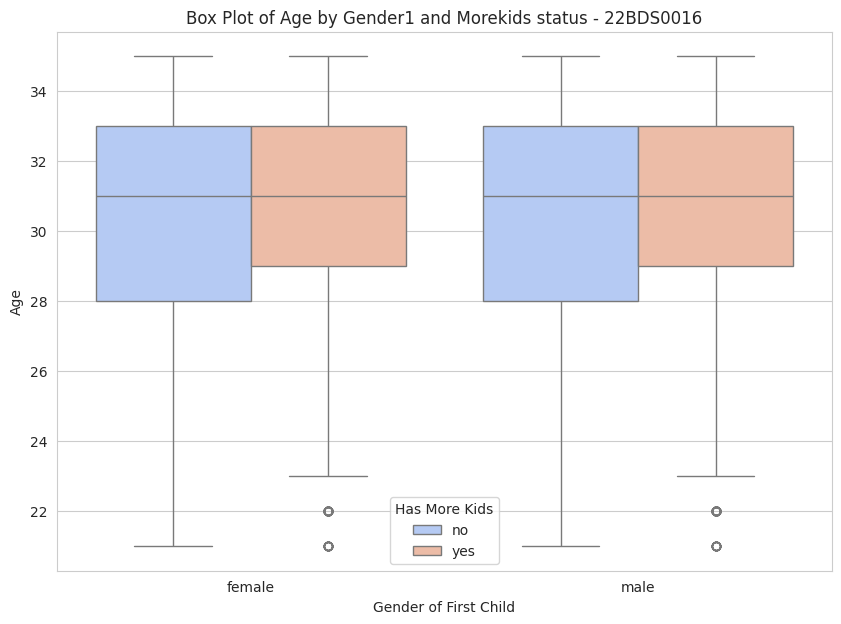

In [ ]:
# --- 3D Analysis ---
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='gender1', y='age', hue='morekids', palette='coolwarm')
plt.title("Box Plot of Age by Gender1 and Morekids status - 22BDS0016")
plt.xlabel("Gender of First Child")
plt.ylabel("Age")
plt.legend(title='Has More Kids')
plt.show()

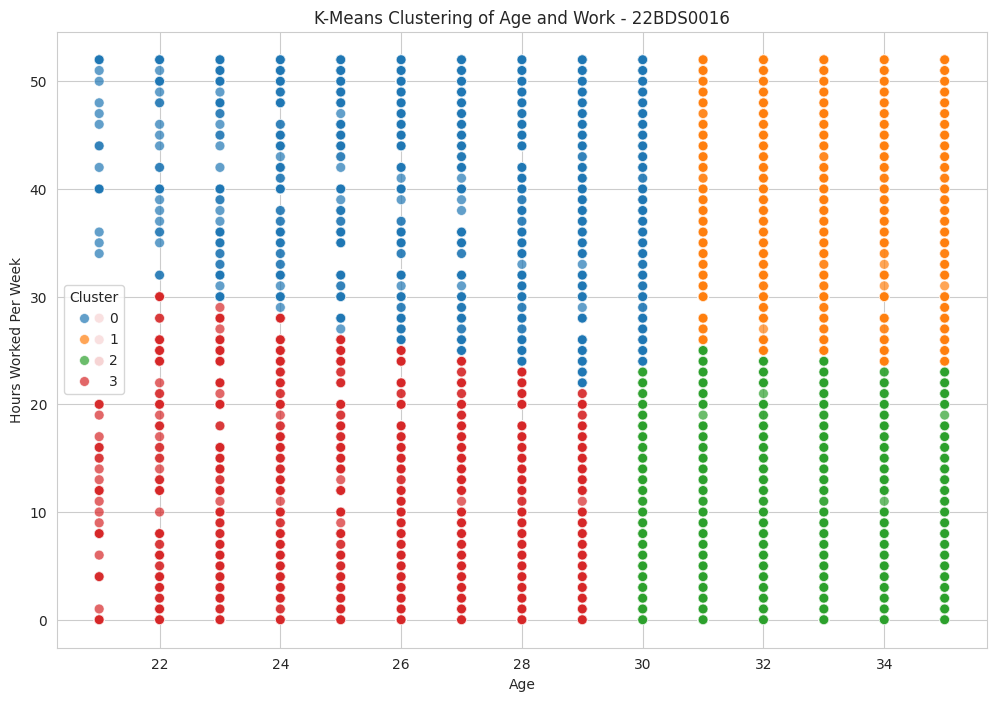

In [ ]:
# --- Clustering (K-Means) ---
SalemPrakash = df[['age', 'work']]

scaler = StandardScaler()
SalemPrakash_scaled = scaler.fit_transform(SalemPrakash)

kmeans = KMeans(n_clusters=4, random_state=16, n_init=10)
df['cluster'] = kmeans.fit_predict(SalemPrakash_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='work', hue='cluster', palette='tab10', s=50, alpha=0.7)
plt.title("K-Means Clustering of Age and Work - 22BDS0016")
plt.xlabel("Age")
plt.ylabel("Hours Worked Per Week")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()